In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
zirconia = pd.read_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 5- Predictive Modelling\Project\Predictive modelling\Problem 1\cubic_zirconia.csv')

In [71]:
head = zirconia.head()
head.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 5- Predictive Modelling\Project\Predictive modelling\Problem 1\head.csv')
head

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [72]:
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [73]:
zirconia.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [112]:
zirconia.dropna(inplace= True)

In [113]:
summary = zirconia.describe().T
summary.to_csv(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 5- Predictive Modelling\Project\Predictive modelling\Problem 1\summary.csv')
summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26270.0,13487.106509,7782.720039,1.0,6741.25,13497.50,20223.75,26967.00
carat,26270.0,0.797995,0.477214,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26270.0,57.456011,2.230776,49.0,56.00,57.00,59.00,79.00
x,26270.0,5.729167,1.127515,0.0,4.71,5.69,6.55,10.23
y,26270.0,5.732967,1.166330,0.0,4.72,5.70,6.54,58.90
z,26270.0,3.536636,0.699335,0.0,2.90,3.52,4.04,8.06
price,26270.0,3937.973734,4022.189341,326.0,945.00,2375.00,5361.00,18818.00


In [114]:
zirconia.duplicated().any()

False

In [115]:
zirconia.shape

(26270, 11)

In [116]:
zir_data = zirconia.drop('Unnamed: 0', axis = 1)

In [117]:
zir_num = zir_data.drop(['cut', 'color', 'clarity'], axis= 1)

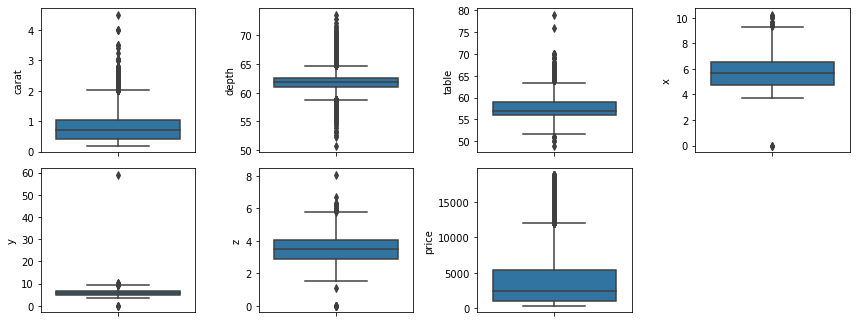

In [118]:
features = zir_num.columns
plt.figure(figsize = (12,9))
for i in range(len(features)):
    plt.subplot(4, 4, i+1)
    box_plot = sns.boxplot(data = zir_num, y = features[i])
    box_plot
    plt.tight_layout()

In [119]:
import os
os.chdir(r'D:\Ashish\Studies\DSBA\PGP-DSBA\Main Course\MODULE 5- Predictive Modelling\Project\Predictive modelling\Problem 1')

In [120]:
box_plot.savefig('1-box_plots.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

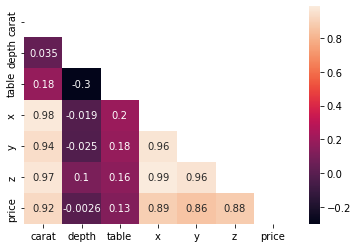

In [121]:
heatmap = sns.heatmap(zir_num.corr(), annot = True, mask = np.triu(zir_num.corr()));

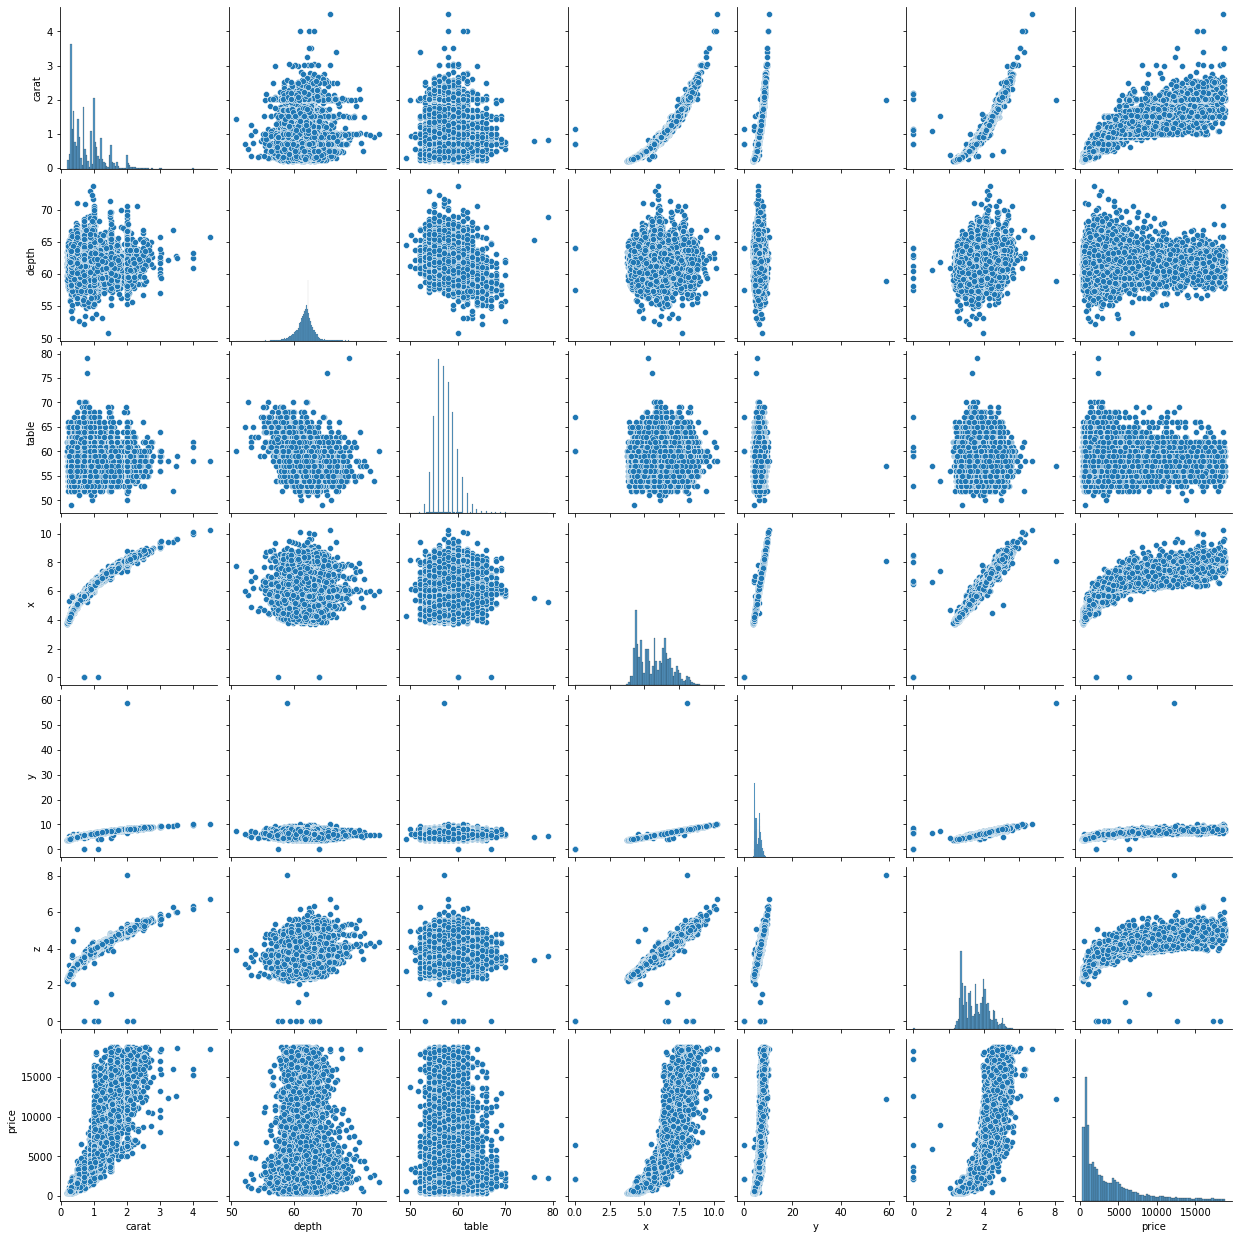

In [122]:
pairplot = sns.pairplot(data = zir_num);
pairplot.savefig('1-pairplot.png')
pairplot

In [123]:
zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [124]:
zir_encoded = pd.get_dummies(zir_data, columns= zir_cat.columns, drop_first= True)
zir_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26270 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26270 non-null  float64
 1   depth          26270 non-null  float64
 2   table          26270 non-null  float64
 3   x              26270 non-null  float64
 4   y              26270 non-null  float64
 5   z              26270 non-null  float64
 6   price          26270 non-null  int64  
 7   cut_Good       26270 non-null  uint8  
 8   cut_Ideal      26270 non-null  uint8  
 9   cut_Premium    26270 non-null  uint8  
 10  cut_Very Good  26270 non-null  uint8  
 11  color_E        26270 non-null  uint8  
 12  color_F        26270 non-null  uint8  
 13  color_G        26270 non-null  uint8  
 14  color_H        26270 non-null  uint8  
 15  color_I        26270 non-null  uint8  
 16  color_J        26270 non-null  uint8  
 17  clarity_IF     26270 non-null  uint8  
 18  clarit

In [125]:
from sklearn.model_selection import train_test_split
X = zir_encoded.drop('price', axis = 1)
y = zir_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 1)

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [127]:
reg_mod = LinearRegression()
reg_mod.fit(X_train, y_train)

LinearRegression()

In [128]:
print('The coefficient of determination R^2 of the prediction on Train set',reg_mod.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9218604236098822


In [129]:
print('The coefficient of determination R^2 of the prediction on Train set',reg_mod.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Train set 0.8912679857076238


In [130]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,reg_mod.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 1312.733803870184


In [131]:
adj_r_sq = 1 - (1-reg_mod.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [132]:
adj_r_sq

0.8909496916604398